In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn_data = pd.read_csv('telecom_churn_data.csv')
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
churn_data.describe

<bound method NDFrame.describe of        mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0      

In [4]:
churn_data.shape

(99999, 226)

In [5]:
raw_data = churn_data.copy()

#Copy of original data
raw_data 

In [6]:
all_columns = churn_data.columns.tolist()

# 1. Filter high-value customers

### 70th percentile of the average recharge amount in the first two months (the good phase).

In [7]:
rech_col = [col for col in all_columns if 'rech' in col]
rech_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [8]:
# total amount of recharge data * avr recharg amount data, for total number of data
raw_data['total_data_rech_amt_6'] = raw_data['av_rech_amt_data_6'] * raw_data['total_rech_data_6']
raw_data['total_data_rech_amt_7'] = raw_data['av_rech_amt_data_7'] * raw_data['total_rech_data_7']
raw_data['total_data_rech_amt_8'] = raw_data['av_rech_amt_data_8'] * raw_data['total_rech_data_8']
raw_data['total_data_rech_amt_9'] = raw_data['av_rech_amt_data_9'] * raw_data['total_rech_data_9']

In [9]:
# Drop above accounted for
raw_data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

In [10]:
## Calculate Average recharge amount for good phase months i.e 6th and 7th month
good_phase_average_rech_amt = ( raw_data['total_rech_amt_6'].fillna(0) + raw_data['total_rech_amt_7'].fillna(0) + 
                               raw_data['total_data_rech_amt_6'].fillna(0) + raw_data['total_data_rech_amt_7'].fillna(0) ) / 2

In [11]:
# 70 percentile of the good_phase_average_rech_amt data
good_phase_average_rech_amt_70 = np.percentile(good_phase_average_rech_amt, 70.0)
print(f'70 Percentile of recharge amount is : {good_phase_average_rech_amt_70}')

70 Percentile of recharge amount is : 478.0


In [12]:
# Keep high value customer data
raw_data = raw_data[good_phase_average_rech_amt >= good_phase_average_rech_amt_70]

print(f'Shape of high value customer data: {raw_data.shape}')

Shape of high value customer data: (30001, 222)


# 2. Tag churners and remove attributes of the churn phase

In [13]:
# 9th month columns
month_9_columns = [col for col in all_columns if '9' in col]

In [14]:
month_9_columns

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [15]:
# Seperating the ic, oc, vol columns 
month9_ic_columns = [col for col in month_9_columns if 'ic' in col and 'mou' in col]
month9_oc_columns = [col for col in month_9_columns if 'oc' in col and 'mou' in col]
month9_vol_columns = [col for col in month_9_columns if 'vol' in col and 'mb' in col]

In [16]:
# Sum of all the ic, oc, vol columns
raw_data['ic_sum'] = churn_data[month9_ic_columns].sum(axis = 1)
raw_data['oc_sum'] = churn_data[month9_ic_columns].sum(axis = 1)
raw_data['vol_sum'] = churn_data[month9_ic_columns].sum(axis = 1)

In [17]:
churn_tag_columns = ['vol_sum', 'oc_sum', 'ic_sum']

#sum of newly aggregrated columns, 0 if all of the columns have 0 values
raw_data['churn'] = raw_data[churn_tag_columns].sum(axis = 1)

raw_data.head(15)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,oc_sum,vol_sum,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,101.20,3.58,252.0,252.0,252.0,NaN,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,18.74,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,122.16,0.00,NaN,354.0,207.0,NaN,104.72,104.72,104.72,314.16
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.00,NaN,NaN,NaN,NaN,757.80,757.80,757.80,2273.40
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,0.00,0.00,NaN,712.0,540.0,252.0,382.42,382.42,382.42,1147.26
33,7000149764,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,977.020,...,1714.67,0.00,5285.0,20424.0,455.0,1814.0,280.39,280.39,280.39,841.17
38,7000815202,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,363.987,...,0.00,0.00,NaN,NaN,NaN,207.0,342.25,342.25,342.25,1026.75
41,7000721289,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,482.832,...,0.00,0.00,NaN,NaN,NaN,NaN,355.29,355.29,355.29,1065.87
48,7000294396,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1873.271,...,0.00,0.00,NaN,NaN,NaN,NaN,2684.39,2684.39,2684.39,8053.17
53,7002188521,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,978.077,...,0.00,0.00,344.0,575.0,23.0,92.0,2041.52,2041.52,2041.52,6124.56


In [18]:
raw_data['churn'] = raw_data['churn'].apply(lambda x: 0 if x > 0 else 1)
raw_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,oc_sum,vol_sum,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,101.20,3.58,252.0,252.0,252.0,NaN,0.00,0.00,0.00,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,18.74,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,122.16,0.00,NaN,354.0,207.0,NaN,104.72,104.72,104.72,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.00,NaN,NaN,NaN,NaN,757.80,757.80,757.80,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,0.00,0.00,NaN,712.0,540.0,252.0,382.42,382.42,382.42,0


In [19]:
raw_data.churn.value_counts(normalize=True) 
raw_data.shape

(30001, 226)

In [20]:
##Dropping Month 9 Columns
raw_data.drop([col for col in month_9_columns + churn_tag_columns if col not in ['total_rech_data_9', 'av_rech_amt_data_9']], axis=1, inplace=True)

In [21]:
raw_data.shape

(30001, 171)

## Modelling
### Preprocess data

In [22]:
# Checking for missing values
msng_values = round(raw_data.isna().sum() / len(raw_data) * 100, 2).sort_values(ascending=False)
msng_values

total_data_rech_amt_9    49.27
arpu_3g_8                46.83
total_data_rech_amt_8    46.83
fb_user_8                46.83
max_rech_data_8          46.83
                         ...  
vol_2g_mb_6               0.00
vol_2g_mb_7               0.00
vol_2g_mb_8               0.00
vol_3g_mb_6               0.00
churn                     0.00
Length: 171, dtype: float64

In [23]:
# Select columns with more than 40% missing values
drop_msng_col = msng_values[msng_values > 40].index.tolist()
drop_msng_col

['total_data_rech_amt_9',
 'arpu_3g_8',
 'total_data_rech_amt_8',
 'fb_user_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'night_pck_user_8',
 'date_of_last_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_6',
 'max_rech_data_6',
 'total_data_rech_amt_6',
 'night_pck_user_6',
 'fb_user_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'arpu_2g_6',
 'date_of_last_rech_data_7',
 'total_data_rech_amt_7',
 'max_rech_data_7',
 'arpu_3g_7',
 'count_rech_2g_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'night_pck_user_7',
 'fb_user_7']

In [24]:
# Drop columns > 40% missing
raw_data.drop(drop_msng_col, axis=1, inplace=True)
raw_data.shape

(30001, 143)

In [25]:
# Re-check missing values
round(raw_data.isna().sum() / len(raw_data) * 100, 2).sort_values(ascending=False)

loc_ic_mou_8          3.91
og_others_8           3.91
loc_og_t2f_mou_8      3.91
loc_ic_t2t_mou_8      3.91
spl_og_mou_8          3.91
                      ... 
max_rech_amt_6        0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
last_day_rch_amt_6    0.00
churn                 0.00
Length: 143, dtype: float64

In [26]:
# Drop rows with missing values
for col in raw_data.columns:
    raw_data = raw_data[~raw_data[col].isna()]
    
# Re-check missing values
round(raw_data.isna().sum() / len(raw_data) * 100, 2).sort_values(ascending=False)

mobile_number       0.0
isd_ic_mou_6        0.0
total_ic_mou_6      0.0
total_ic_mou_7      0.0
total_ic_mou_8      0.0
                   ... 
std_og_t2c_mou_7    0.0
std_og_t2c_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
churn               0.0
Length: 143, dtype: float64

In [27]:
# The date columns don't add any value excpet for marking the last day of the period so we will drop them
date_col = [col for col in raw_data.columns if 'date' in col]
raw_data.drop(date_col, axis=1, inplace=True)
[col for col in churn_data.columns if 'date' in col]

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [28]:
print(raw_data.shape)
raw_data.head(20)

(28163, 137)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,7000887461,109,0.0,0.0,0.0,74.350,193.897,366.966,48.96,50.66,...,1,0,0,1,604,40.45,51.86,0.00,0.0,0
33,7000149764,109,0.0,0.0,0.0,977.020,2362.833,409.230,0.00,0.00,...,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0
38,7000815202,109,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,...,0,0,0,0,1155,0.00,0.00,0.00,0.0,0
41,7000721289,109,0.0,0.0,0.0,482.832,425.764,229.769,86.39,118.88,...,0,0,0,0,2010,0.00,0.00,0.00,0.0,0
48,7000294396,109,0.0,0.0,0.0,1873.271,575.927,179.218,2061.69,881.43,...,0,0,0,0,1265,0.00,0.00,0.00,0.0,0
53,7002188521,109,0.0,0.0,0.0,978.077,1141.296,706.020,135.14,119.59,...,0,0,0,0,697,0.00,0.00,0.00,0.0,0
56,7002180748,109,0.0,0.0,0.0,452.624,320.548,368.807,34.46,43.11,...,0,0,0,0,729,277.97,535.63,1459.45,0.0,0


In [29]:
# Check columns for only 1 unique value
drop_col_sngl_val = []

for col in raw_data.columns:
    if raw_data[f'{col}'].nunique() == 1:
        drop_col_sngl_val.append(col)

drop_col_sngl_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [30]:
# Drop single value columns
raw_data.drop(drop_col_sngl_val, axis=1, inplace=True)
raw_data.shape

(28163, 127)

In [31]:
raw_data.drop('mobile_number', axis=1, inplace=True)
raw_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1,0,0,1,604,40.45,51.86,0.00,0.0,0
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0


## Correlation

In [32]:
corr = raw_data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7       arpu_6         0.728704
arpu_8       arpu_6         0.671437
             arpu_7         0.778413
onnet_mou_7  onnet_mou_6    0.770224
onnet_mou_8  onnet_mou_6    0.646114
                              ...   
aug_vbc_3g   vol_3g_mb_8    0.620313
jul_vbc_3g   vol_3g_mb_7    0.651025
             aug_vbc_3g     0.706559
jun_vbc_3g   vol_3g_mb_6    0.662497
             jul_vbc_3g     0.680020
Length: 207, dtype: float64

In [33]:
# List of columns that are explained well by other columns
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns
raw_data.drop(drop_col_corr, axis=1, inplace=True)
raw_data.shape

(28163, 87)

In [34]:
raw_data

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,0,802,57.74,19.38,18.74,0.00,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,0,0,315,21.03,910.65,122.16,0.00,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,0,0,720,0.00,0.00,0.00,0.00,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1,0,0,1,604,40.45,51.86,0.00,0.00,0
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,3,0,1328,358.10,2706.83,1714.67,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,384.316,255.405,393.474,78.68,29.04,103.24,56.13,28.09,61.44,0.00,...,1,0,0,0,473,1100.43,619.59,668.05,0.33,0
99984,328.594,202.966,118.707,423.99,181.83,5.71,39.51,39.81,18.26,0.00,...,0,0,0,0,820,0.00,0.00,0.00,0.00,0
99986,644.973,455.228,564.334,806.73,549.36,775.41,784.76,617.13,595.44,0.00,...,0,0,0,0,2696,497.45,598.67,604.08,0.00,0
99988,312.558,512.932,402.080,199.89,174.46,2.46,175.88,277.01,248.33,0.00,...,0,0,0,0,328,104.73,0.00,0.00,0.00,0


## Derive new features

In [35]:
# Create a total mou instead of offnet and onnet

raw_data['total_mou_6'] = raw_data['onnet_mou_6'] + raw_data['offnet_mou_6']
raw_data['total_mou_7'] = raw_data['onnet_mou_7'] + raw_data['offnet_mou_7']
raw_data['total_mou_8'] = raw_data['onnet_mou_8'] + raw_data['offnet_mou_8']

# Drop the mou columns
raw_data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

In [36]:
raw_data.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_6,total_mou_7,total_mou_8
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,0.0,...,0,802,57.74,19.38,18.74,0.0,1,511.27,621.84,378.20
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,315,21.03,910.65,122.16,0.0,0,508.35,431.66,171.56
21,514.453,597.753,637.760,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,720,0.00,0.00,0.00,0.0,0,860.34,1028.79,1068.53
23,74.350,193.897,366.966,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,1,604,40.45,51.86,0.00,0.0,0,134.37,140.02,239.47
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,1328,358.10,2706.83,1714.67,0.0,0,0.00,0.00,0.00


In [37]:
# Seperate columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in raw_data.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6_7):
    raw_data[f'gd_ph_{col}'] = ( raw_data[f'{col}_6'] + raw_data[f'{col}_7'] ) / 2
    raw_data.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
raw_data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,...,gd_ph_std_og_t2f_mou,gd_ph_sachet_2g,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_roam_og_mou,gd_ph_arpu,gd_ph_monthly_3g,gd_ph_total_rech_num,gd_ph_std_ic_t2f_mou,gd_ph_og_others
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,...,13.37,0.0,15.465,1185.0,18.165,1209.5150,0.0,5.0,43.215,0.0
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,...,0.00,0.5,0.000,122.0,0.000,435.4720,0.0,20.0,0.000,0.0
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,...,0.00,0.0,0.000,50.0,0.000,556.1030,0.0,24.0,0.000,0.0
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,...,0.00,0.0,2.675,89.5,0.000,134.1235,1.0,4.0,0.000,0.0
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,...,0.00,0.0,0.940,753.5,0.000,1669.9265,4.5,10.5,0.595,0.0


In [38]:
# Create new column
raw_data['gd_ph_vbc_3g'] = ( raw_data['jul_vbc_3g'] + raw_data['jun_vbc_3g'] ) / 2

# Drop redundant column
raw_data.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
raw_data['vbc_3g_8'] = raw_data['aug_vbc_3g']
raw_data.drop('aug_vbc_3g', axis=1, inplace=True)

raw_data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,...,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_roam_og_mou,gd_ph_arpu,gd_ph_monthly_3g,gd_ph_total_rech_num,gd_ph_std_ic_t2f_mou,gd_ph_og_others,gd_ph_vbc_3g,vbc_3g_8
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,...,15.465,1185.0,18.165,1209.5150,0.0,5.0,43.215,0.0,19.060,57.74
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,...,0.000,122.0,0.000,435.4720,0.0,20.0,0.000,0.0,516.405,21.03
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,...,0.000,50.0,0.000,556.1030,0.0,24.0,0.000,0.0,0.000,0.00
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,...,2.675,89.5,0.000,134.1235,1.0,4.0,0.000,0.0,25.930,40.45
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,...,0.940,753.5,0.000,1669.9265,4.5,10.5,0.595,0.0,2210.750,358.10


In [39]:
raw_data.shape

(28163, 56)

In [40]:
# Reset the index 
raw_data.reset_index(inplace=True, drop=True)
raw_data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,...,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_roam_og_mou,gd_ph_arpu,gd_ph_monthly_3g,gd_ph_total_rech_num,gd_ph_std_ic_t2f_mou,gd_ph_og_others,gd_ph_vbc_3g,vbc_3g_8
0,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,...,15.465,1185.0,18.165,1209.5150,0.0,5.0,43.215,0.0,19.060,57.74
1,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,...,0.000,122.0,0.000,435.4720,0.0,20.0,0.000,0.0,516.405,21.03
2,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,...,0.000,50.0,0.000,556.1030,0.0,24.0,0.000,0.0,0.000,0.00
3,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,...,2.675,89.5,0.000,134.1235,1.0,4.0,0.000,0.0,25.930,40.45
4,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,...,0.940,753.5,0.000,1669.9265,4.5,10.5,0.595,0.0,2210.750,358.10


In [41]:
raw_data.describe()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,...,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_roam_og_mou,gd_ph_arpu,gd_ph_monthly_3g,gd_ph_total_rech_num,gd_ph_std_ic_t2f_mou,gd_ph_og_others,gd_ph_vbc_3g,vbc_3g_8
count,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,...,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000
mean,528.992500,13.145865,20.926258,1.789363,247.845569,1.646062,322.121339,1.989213,6.889342,0.061151,...,1.371220,167.748198,23.757457,567.163074,0.213773,12.026489,2.835280,0.359434,169.310408,173.745705
std,500.479643,76.125433,107.722393,7.390599,367.353912,11.126142,615.275135,45.888765,20.813297,3.421503,...,14.081974,148.011960,94.459260,431.807280,0.565446,8.650631,18.312495,2.533710,395.513994,424.621028
min,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-451.713500,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,258.075500,0.000000,0.000000,0.000000,31.410000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,104.000000,0.000000,355.689750,0.000000,6.500000,0.000000,0.000000,0.000000,0.000000
50%,445.338000,0.000000,0.000000,0.000000,124.060000,0.000000,34.990000,0.000000,0.700000,0.000000,...,0.000000,128.000000,0.000000,490.352500,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000
75%,675.208500,0.000000,0.000000,0.130000,325.160000,0.000000,392.840000,0.000000,6.640000,0.000000,...,0.240000,198.000000,3.345000,682.077250,0.000000,14.500000,0.750000,0.000000,157.682500,142.470000
max,33543.624000,4169.810000,5337.040000,351.830000,11039.910000,516.910000,13980.060000,5681.540000,954.510000,394.930000,...,1420.040000,3299.000000,2410.835000,31438.461000,11.500000,155.500000,1185.045000,304.905000,8190.585000,12916.220000


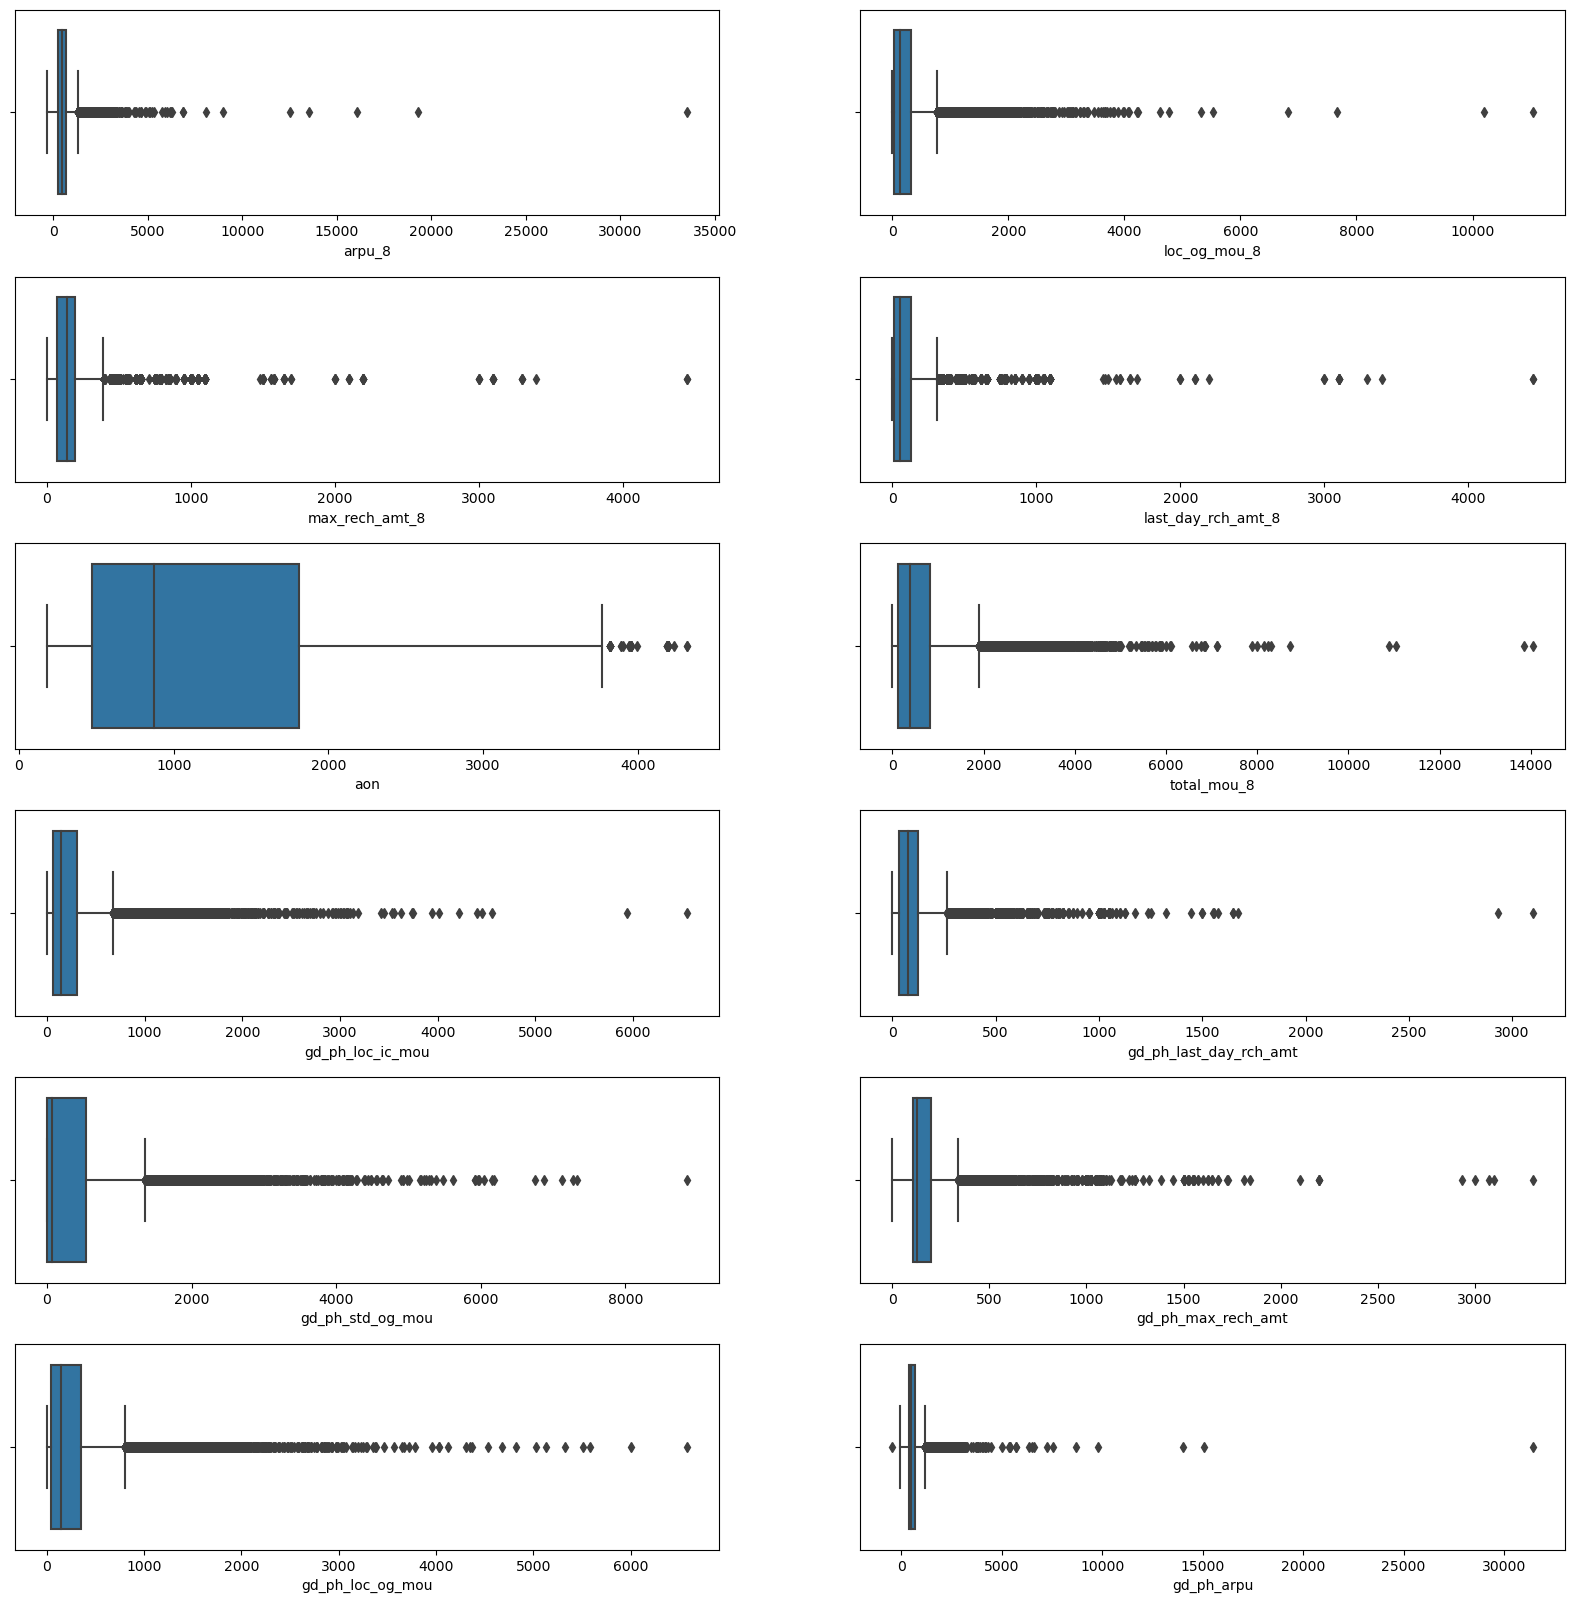

In [42]:
# List of features to be analyzed
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))
# sns.boxplot(x=raw_data['arpu_8'], ax=axes[0])
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(raw_data[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

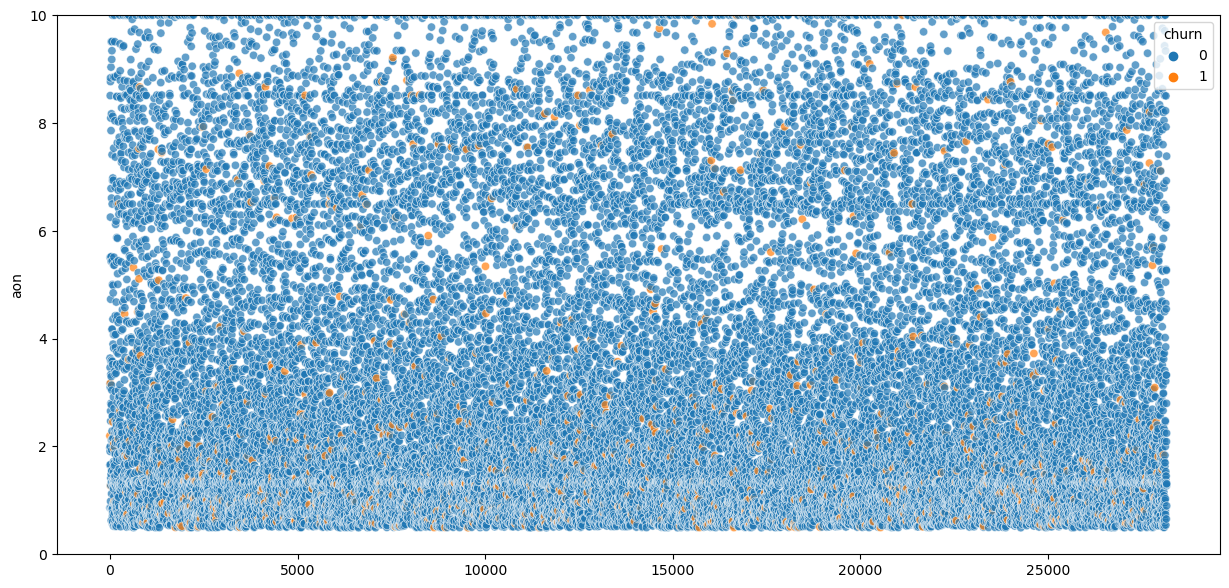

In [43]:
# Check churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=raw_data['aon'] / 365, x=raw_data.index, hue=raw_data.churn, alpha=0.7)
plt.ylim(0,10)
plt.show()

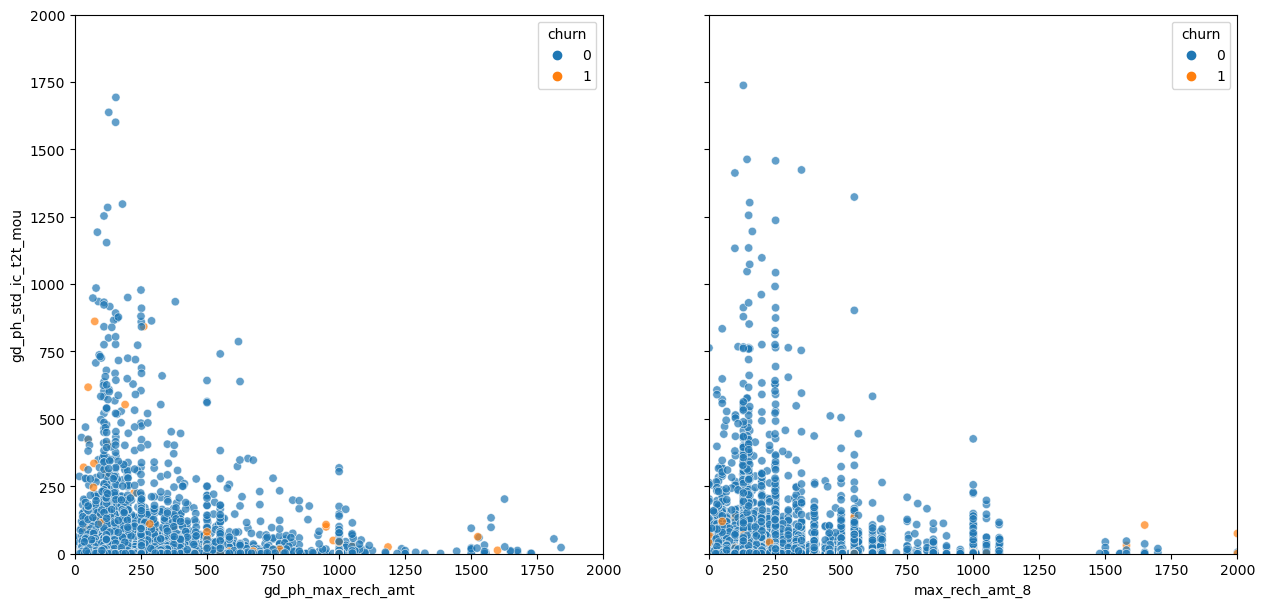

In [44]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_std_ic_t2t_mou', data=raw_data, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_ic_t2t_mou_8', data=raw_data, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()

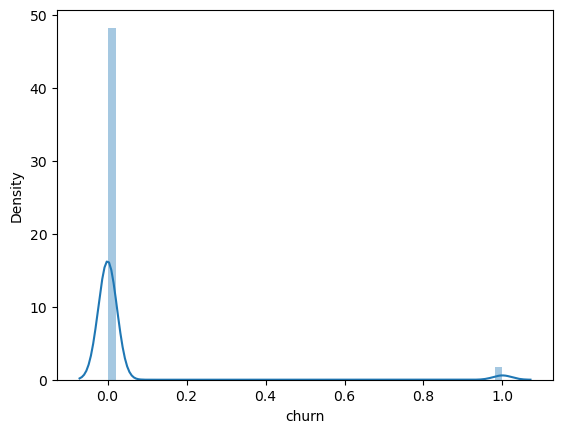

In [45]:
# Distribution of target variable

sns.distplot(raw_data['churn'])
plt.show()

In [46]:
# Cap the features with high outliers

col_upr_lmt = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon', 3000), ('total_mou_8', 4000), ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ), 
               ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 3000), ('gd_ph_arpu', 7000)]

for col, value in col_upr_lmt:
    raw_data[col] = raw_data[col].apply(lambda x : x if x < value else value)

raw_data[col_boxplot].head()

,arpu_8,loc_og_mou_8,max_rech_amt_8,last_day_rch_amt_8,aon,total_mou_8,gd_ph_loc_ic_mou,gd_ph_last_day_rch_amt,gd_ph_std_og_mou,gd_ph_max_rech_amt,gd_ph_loc_og_mou,gd_ph_arpu
0,3171.480,255.79,1000,779,802,378.20,391.555,0.0,68.000,1185.0,478.035,1209.5150
1,137.362,63.04,30,10,315,171.56,52.630,25.0,136.870,122.0,333.135,435.4720
2,637.760,129.74,50,50,720,1068.53,106.505,25.0,848.990,50.0,95.565,556.1030
3,366.966,182.14,179,0,604,239.47,145.520,89.5,4.355,89.5,132.795,134.1235
4,409.230,0.00,455,455,1328,0.00,2.180,126.0,0.000,753.5,0.000,1669.9265


In [47]:
y = raw_data['churn']
X = raw_data.drop('churn', axis=1)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

## handle class imbalance

In [49]:
raw_data.churn.value_counts()

0    27178
1      985
Name: churn, dtype: int64

In [50]:
# Use SMOTE to take care of class imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [51]:
y_res.value_counts()

1    27178
0    27178
Name: churn, dtype: int64

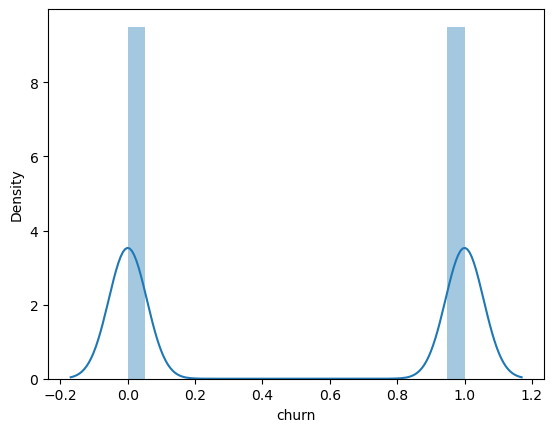

In [52]:
sns.distplot(y_res)
plt.show()

In [53]:
X.shape

(28163, 55)

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(54356, 25)

# Model Building
## 1. Logistic Regression

In [55]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=25)

In [56]:
import statsmodels.api as sm

In [57]:
# Initial logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38049
Model:                            GLM   Df Residuals:                    37993
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18184.
Date:                Fri, 17 Feb 2023   Deviance:                       36368.
Time:                        12:32:13   Pearson chi2:                 3.60e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3498
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.3011      0.022    -60.407      0.000      -1.343      -1.259
arpu_8                     0.3077      0.045      6.895      0.000       0.220       0.395
roam_ic_mou_8             -0.4467      0.034    -12.949      0.000      -0.514      -0.379
roam_og_mou_8              0.0475      0.030      1.600      0.110      -0.011       0.106
loc_og_t2c_mou_8           0.0890      0.023      3.819      0.000       0.043       0.135
loc_og_mou_8              -0.1927      0.082     -2.337      0.019      -0.354      -0.031
std_og_t2f_mou_8          -0.1019      0.039     -2.634      0.008      -0.178      -0.026
std_og_mou_8               0.0459      0.112      0.411      0.681      -0.173       0.265
isd_og_mou_8              -0.1898      0.068     -2.802      0.005      -0.323      -0.057
spl_og_mou_8              -0.1512      0.033     -4.577      0.000      -0.216      -0.086
og_others_8                0.0828      0.021      3.999      0.000       0.042       0.123
loc_ic_mou_8              -1.8266      0.059    -31.187      0.000      -1.941      -1.712
std_ic_t2t_mou_8          -0.7132      0.067    -10.577      0.000      -0.845      -0.581
std_ic_t2f_mou_8          -0.0680      0.049     -1.399      0.162      -0.163       0.027
std_ic_mou_8              -0.1141      0.042     -2.719      0.007      -0.196      -0.032
spl_ic_mou_8              -0.2161      0.021    -10.242      0.000      -0.257      -0.175
isd_ic_mou_8              -0.1549      0.029     -5.409      0.000      -0.211      -0.099
ic_others_8                0.1842      0.032      5.722      0.000       0.121       0.247
total_rech_num_8          -0.4877      0.034    -14.343      0.000      -0.554      -0.421
max_rech_amt_8             0.1988      0.023      8.582      0.000       0.153       0.244
last_day_rch_amt_8        -0.4302      0.019    -22.311      0.000      -0.468      -0.392
vol_2g_mb_8               -0.2323      0.026     -8.898      0.000      -0.283      -0.181
monthly_2g_8              -0.4682      0.025    -18.920      0.000      -0.517      -0.420
sachet_2g_8               -0.3956      0.027    -14.885      0.000      -0.448      -0.344
monthly_3g_8              -0.6772      0.032    -21.332      0.000      -0.739      -0.615
sachet_3g_8               -0.3103      0.031    -10.114      0.000      -0.370      -0.250
aon                       -0.4457      0.016    -27.484      0.000      -0.478      -0.414
total_mou_8               -0.8347      0.126     -6.626      0.000      -1.082      -0.588
gd_ph_spl_og_mou           0.1191      0.026      4.600      0.000       0.068       0.170
gd_ph_isd_ic_mou           0.1601      0.022      7.235      0.000       0.117       0.203
gd_ph_std_ic_t2t_mou       0.2235      0.031      7.156      0.000       0.162  

### RFE for Feature Selection

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create LR object
logreg = LogisticRegression(solver='liblinear')

# Run RFE for 25 features
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [59]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_ic_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sachet_3g_8', 'aon', 'total_mou_8', 'gd_ph_std_ic_t2t_mou',
       'gd_ph_std_og_mou', 'gd_ph_total_mou', 'gd_ph_loc_og_mou',
       'gd_ph_loc_ic_mou', 'gd_ph_sachet_3g', 'gd_ph_ic_others',
       'gd_ph_roam_og_mou', 'gd_ph_monthly_3g', 'gd_ph_total_rech_num',
       'gd_ph_std_ic_t2f_mou'],
      dtype='object')

In [60]:
# Build model with RFE selected features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38049
Model:                            GLM   Df Residuals:                    38023
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18422.
Date:                Fri, 17 Feb 2023   Deviance:                       36845.
Time:                        12:32:42   Pearson chi2:                 7.07e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3416
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2625      0.021    -59.635      0.000      -1.304      -1.221
arpu_8                   0.2159      0.030      7.178      0.000       0.157       0.275
roam_ic_mou_8           -0.3769      0.026    -14.780      0.000      -0.427      -0.327
loc_ic_mou_8            -1.9526      0.054    -35.968      0.000      -2.059      -1.846
std_ic_t2t_mou_8        -0.7835      0.062    -12.684      0.000      -0.905      -0.662
spl_ic_mou_8            -0.2371      0.021    -11.394      0.000      -0.278      -0.196
total_rech_num_8        -0.5521      0.032    -17.168      0.000      -0.615      -0.489
max_rech_amt_8           0.2612      0.021     12.564      0.000       0.220       0.302
last_day_rch_amt_8      -0.4305      0.019    -22.918      0.000      -0.467      -0.394
monthly_2g_8            -0.5740      0.020    -28.810      0.000      -0.613      -0.535
sachet_2g_8             -0.3344      0.019    -17.552      0.000      -0.372      -0.297
monthly_3g_8            -0.7131      0.030    -23.796      0.000      -0.772      -0.654
sachet_3g_8             -0.3341      0.031    -10.745      0.000      -0.395      -0.273
aon                     -0.4514      0.016    -28.548      0.000      -0.482      -0.420
total_mou_8             -0.7643      0.035    -22.114      0.000      -0.832      -0.697
gd_ph_std_ic_t2t_mou     0.2115      0.026      8.295      0.000       0.162       0.262
gd_ph_std_og_mou         0.6886      0.171      4.024      0.000       0.353       1.024
gd_ph_total_mou         -0.5166      0.194     -2.658      0.008      -0.898      -0.136
gd_ph_loc_og_mou         0.5259      0.106      4.978      0.000       0.319       0.733
gd_ph_loc_ic_mou         0.6661      0.038     17.365      0.000       0.591       0.741
gd_ph_sachet_3g          0.2362      0.021     11.148      0.000       0.195       0.278
gd_ph_ic_others         -0.2259      0.050     -4.544      0.000      -0.323      -0.128
gd_ph_roam_og_mou        0.2499      0.031      8.021      0.000       0.189       0.311
gd_ph_monthly_3g         0.2724      0.022     12.498      0.000       0.230       0.315
gd_ph_total_rech_num     0.2953      0.023     12.862      0.000       0.250       0.340
gd_ph_std_ic_t2f_mou    -0.2147      0.036     -6.001      0.000      -0.285      -0.145
========================================================================================
"""

#### Predict on train data

In [61]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.362380,0
1,0,0.063152,0
2,0,0.215666,0
3,1,0.872668,1
4,1,0.998929,1


In [62]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14303  4672]
 [ 3696 15378]]

Accuracy : 0.7800730636810429


In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,gd_ph_total_mou,94.29
15,gd_ph_std_og_mou,82.28
17,gd_ph_loc_og_mou,24.67
0,arpu_8,4.16
13,total_mou_8,3.99
2,loc_ic_mou_8,3.34
18,gd_ph_loc_ic_mou,3.31
5,total_rech_num_8,3.29
21,gd_ph_roam_og_mou,3.26
6,max_rech_amt_8,2.57


In [64]:
rfe_col = rfe_col.drop('total_mou_8', 1)

In [65]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38049
Model:                            GLM   Df Residuals:                    38024
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18694.
Date:                Fri, 17 Feb 2023   Deviance:                       37387.
Time:                        12:32:45   Pearson chi2:                 5.70e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3321
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2523      0.021    -59.026      0.000      -1.294      -1.211
arpu_8                  -0.1126      0.027     -4.168      0.000      -0.165      -0.060
roam_ic_mou_8           -0.3373      0.025    -13.666      0.000      -0.386      -0.289
loc_ic_mou_8            -2.1395      0.055    -39.254      0.000      -2.246      -2.033
std_ic_t2t_mou_8        -0.8853      0.063    -14.011      0.000      -1.009      -0.761
spl_ic_mou_8            -0.2396      0.021    -11.540      0.000      -0.280      -0.199
total_rech_num_8        -0.8057      0.031    -25.652      0.000      -0.867      -0.744
max_rech_amt_8           0.3147      0.021     15.350      0.000       0.275       0.355
last_day_rch_amt_8      -0.4457      0.019    -23.950      0.000      -0.482      -0.409
monthly_2g_8            -0.5494      0.020    -27.494      0.000      -0.589      -0.510
sachet_2g_8             -0.2858      0.019    -14.987      0.000      -0.323      -0.248
monthly_3g_8            -0.6392      0.030    -21.359      0.000      -0.698      -0.581
sachet_3g_8             -0.2746      0.031     -8.780      0.000      -0.336      -0.213
aon                     -0.4407      0.016    -28.015      0.000      -0.472      -0.410
gd_ph_std_ic_t2t_mou     0.2386      0.026      9.118      0.000       0.187       0.290
gd_ph_std_og_mou         0.1520      0.140      1.088      0.277      -0.122       0.426
gd_ph_total_mou         -0.2418      0.160     -1.512      0.130      -0.555       0.072
gd_ph_loc_og_mou         0.1943      0.088      2.220      0.026       0.023       0.366
gd_ph_loc_ic_mou         0.8039      0.039     20.831      0.000       0.728       0.880
gd_ph_sachet_3g          0.2017      0.021      9.577      0.000       0.160       0.243
gd_ph_ic_others         -0.2128      0.049     -4.328      0.000      -0.309      -0.116
gd_ph_roam_og_mou        0.1739      0.027      6.549      0.000       0.122       0.226
gd_ph_monthly_3g         0.2788      0.022     12.766      0.000       0.236       0.322
gd_ph_total_rech_num     0.4740      0.022     21.407      0.000       0.431       0.517
gd_ph_std_ic_t2f_mou    -0.1740      0.034     -5.097      0.000      -0.241      -0.107
========================================================================================
"""

In [66]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.370103,0
1,0,0.116161,0
2,0,0.117777,0
3,1,0.879784,1
4,1,0.998898,1


In [67]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14108  4867]
 [ 3660 15414]]

Accuracy : 0.7758942416357855


In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,gd_ph_total_mou,94.28
14,gd_ph_std_og_mou,81.31
16,gd_ph_loc_og_mou,24.32
2,loc_ic_mou_8,3.28
17,gd_ph_loc_ic_mou,3.26
20,gd_ph_roam_og_mou,3.24
0,arpu_8,3.22
5,total_rech_num_8,2.85
6,max_rech_amt_8,2.54
22,gd_ph_total_rech_num,2.20


In [69]:
# Drop 'gd_ph_total_mou'
rfe_col = rfe_col.drop('gd_ph_total_mou', 1)

In [70]:
# Again Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38049
Model:                            GLM   Df Residuals:                    38025
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18695.
Date:                Fri, 17 Feb 2023   Deviance:                       37389.
Time:                        12:32:48   Pearson chi2:                 5.96e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3321
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2512      0.021    -59.032      0.000      -1.293      -1.210
arpu_8                  -0.1203      0.027     -4.535      0.000      -0.172      -0.068
roam_ic_mou_8           -0.3371      0.025    -13.646      0.000      -0.385      -0.289
loc_ic_mou_8            -2.1346      0.054    -39.248      0.000      -2.241      -2.028
std_ic_t2t_mou_8        -0.8847      0.063    -14.005      0.000      -1.008      -0.761
spl_ic_mou_8            -0.2399      0.021    -11.551      0.000      -0.281      -0.199
total_rech_num_8        -0.8009      0.031    -25.658      0.000      -0.862      -0.740
max_rech_amt_8           0.3144      0.020     15.349      0.000       0.274       0.355
last_day_rch_amt_8      -0.4444      0.019    -23.917      0.000      -0.481      -0.408
monthly_2g_8            -0.5494      0.020    -27.492      0.000      -0.589      -0.510
sachet_2g_8             -0.2872      0.019    -15.071      0.000      -0.325      -0.250
monthly_3g_8            -0.6375      0.030    -21.320      0.000      -0.696      -0.579
sachet_3g_8             -0.2746      0.031     -8.783      0.000      -0.336      -0.213
aon                     -0.4405      0.016    -28.002      0.000      -0.471      -0.410
gd_ph_std_ic_t2t_mou     0.2386      0.026      9.115      0.000       0.187       0.290
gd_ph_std_og_mou        -0.0581      0.015     -3.904      0.000      -0.087      -0.029
gd_ph_loc_og_mou         0.0651      0.019      3.447      0.001       0.028       0.102
gd_ph_loc_ic_mou         0.8028      0.039     20.802      0.000       0.727       0.878
gd_ph_sachet_3g          0.2013      0.021      9.569      0.000       0.160       0.243
gd_ph_ic_others         -0.2124      0.049     -4.321      0.000      -0.309      -0.116
gd_ph_roam_og_mou        0.1401      0.014      9.880      0.000       0.112       0.168
gd_ph_monthly_3g         0.2781      0.022     12.742      0.000       0.235       0.321
gd_ph_total_rech_num     0.4711      0.022     21.373      0.000       0.428       0.514
gd_ph_std_ic_t2f_mou    -0.1741      0.034     -5.097      0.000      -0.241      -0.107
========================================================================================
"""

In [71]:
# Again Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.369878,0
1,0,0.115896,0
2,0,0.117372,0
3,1,0.879957,1
4,1,0.998883,1


In [72]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14113  4862]
 [ 3662 15412]]

Accuracy : 0.7759730873347526


In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_ic_mou_8,3.28
16,gd_ph_loc_ic_mou,3.26
0,arpu_8,3.11
5,total_rech_num_8,2.83
6,max_rech_amt_8,2.54
21,gd_ph_total_rech_num,2.18
10,monthly_3g_8,1.97
7,last_day_rch_amt_8,1.93
20,gd_ph_monthly_3g,1.92
3,std_ic_t2t_mou_8,1.73


In [74]:
# Drop 'loc_ic_mou_8'
rfe_col = rfe_col.drop('loc_ic_mou_8', 1)

In [75]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38049
Model:                            GLM   Df Residuals:                    38026
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19779.
Date:                Fri, 17 Feb 2023   Deviance:                       39559.
Time:                        12:32:50   Pearson chi2:                 1.32e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2929
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.9410      0.018    -53.362      0.000      -0.976      -0.906
arpu_8                  -0.3383      0.027    -12.362      0.000      -0.392      -0.285
roam_ic_mou_8           -0.1997      0.023     -8.551      0.000      -0.245      -0.154
std_ic_t2t_mou_8        -1.1054      0.065    -16.981      0.000      -1.233      -0.978
spl_ic_mou_8            -0.2652      0.021    -12.690      0.000      -0.306      -0.224
total_rech_num_8        -1.0344      0.032    -32.692      0.000      -1.096      -0.972
max_rech_amt_8           0.3112      0.020     15.746      0.000       0.272       0.350
last_day_rch_amt_8      -0.4403      0.018    -24.265      0.000      -0.476      -0.405
monthly_2g_8            -0.5561      0.020    -28.499      0.000      -0.594      -0.518
sachet_2g_8             -0.2893      0.019    -15.221      0.000      -0.327      -0.252
monthly_3g_8            -0.6076      0.029    -20.894      0.000      -0.665      -0.551
sachet_3g_8             -0.2398      0.031     -7.810      0.000      -0.300      -0.180
aon                     -0.4848      0.015    -32.405      0.000      -0.514      -0.455
gd_ph_std_ic_t2t_mou     0.3198      0.025     12.574      0.000       0.270       0.370
gd_ph_std_og_mou         0.0198      0.015      1.338      0.181      -0.009       0.049
gd_ph_loc_og_mou         0.0028      0.017      0.164      0.870      -0.031       0.037
gd_ph_loc_ic_mou        -0.3293      0.020    -16.585      0.000      -0.368      -0.290
gd_ph_sachet_3g          0.1805      0.021      8.780      0.000       0.140       0.221
gd_ph_ic_others         -0.1483      0.041     -3.605      0.000      -0.229      -0.068
gd_ph_roam_og_mou        0.1339      0.014      9.408      0.000       0.106       0.162
gd_ph_monthly_3g         0.2621      0.021     12.507      0.000       0.221       0.303
gd_ph_total_rech_num     0.6339      0.022     29.033      0.000       0.591       0.677
gd_ph_std_ic_t2f_mou    -0.1965      0.032     -6.178      0.000      -0.259      -0.134
========================================================================================
"""

In [76]:
# again2 Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.235423,0
1,0,0.244065,0
2,0,0.157252,0
3,1,0.836035,1
4,1,0.997495,1


In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[13928  5047]
 [ 4276 14798]]

Accuracy : 0.7549738495098426


In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,3.06
4,total_rech_num_8,2.74
5,max_rech_amt_8,2.54
20,gd_ph_total_rech_num,2.11
9,monthly_3g_8,1.97
6,last_day_rch_amt_8,1.93
19,gd_ph_monthly_3g,1.92
2,std_ic_t2t_mou_8,1.72
12,gd_ph_std_ic_t2t_mou,1.71
10,sachet_3g_8,1.68


In [79]:
# true positive 
TP = confusion[1,1] 
# true negatives
TN = confusion[0,0] 
# false positives
FP = confusion[0,1]
# false negatives
FN = confusion[1,0]

In [80]:
# sensitivity of logistic regression model
TP / float(TP+FN)

0.7758204886232568

In [81]:
# calculate specificity
TN / float(TN+FP)

0.7340184453227931

In [82]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.26598155467720686


In [83]:
# positive predictive value 
print (TP / float(TP+FP))

0.745679012345679


In [84]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7651065699846188


### Plotting ROC

In [85]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

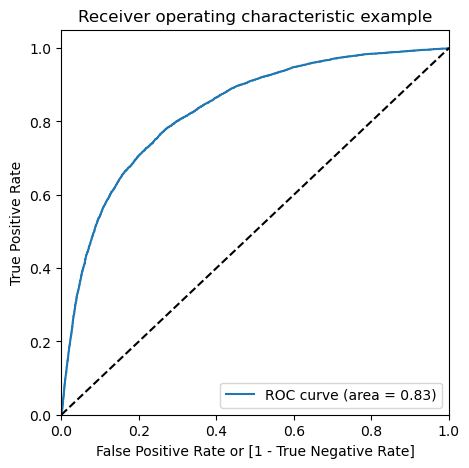

In [86]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [87]:
# Probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.235423,0,1,1,1,0,0,0,0,0,0,0
1,0,0.244065,0,1,1,1,0,0,0,0,0,0,0
2,0,0.157252,0,1,1,0,0,0,0,0,0,0,0
3,1,0.836035,1,1,1,1,1,1,1,1,1,1,0
4,1,0.997495,1,1,1,1,1,1,1,1,1,1,1


In [88]:
# Accuracy of sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.501301  1.000000  0.000000
0.1   0.1  0.584746  0.985792  0.181607
0.2   0.2  0.652448  0.961938  0.341344
0.3   0.3  0.704250  0.918108  0.489275
0.4   0.4  0.736287  0.853256  0.618709
0.5   0.5  0.754974  0.775820  0.734018
0.6   0.6  0.749823  0.671333  0.828722
0.7   0.7  0.719441  0.536437  0.903399
0.8   0.8  0.640043  0.321170  0.960580
0.9   0.9  0.532682  0.075443  0.992306


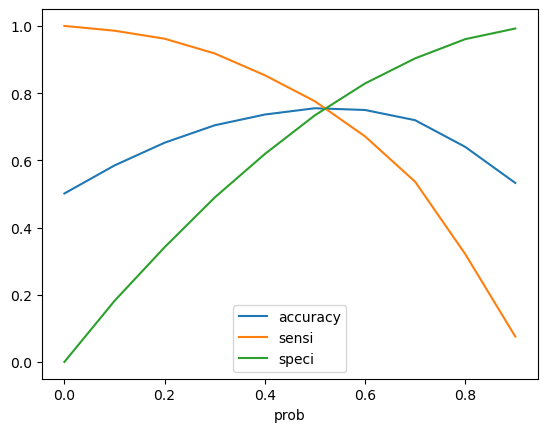

In [89]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [90]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
34036,1,0.808652,1
31895,1,0.830340,1
32487,1,0.611340,1
12666,0,0.887938,1
52790,1,0.426283,0


In [91]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[5992 2211]
 [1845 6259]]

Accuracy : 0.7512724596798921


In [92]:
# Top 10 predictors

abs(res.params).sort_values(ascending=False)[0:11]

std_ic_t2t_mou_8        1.105399
total_rech_num_8        1.034434
const                   0.941012
gd_ph_total_rech_num    0.633922
monthly_3g_8            0.607619
monthly_2g_8            0.556118
aon                     0.484777
last_day_rch_amt_8      0.440268
arpu_8                  0.338290
gd_ph_loc_ic_mou        0.329274
gd_ph_std_ic_t2t_mou    0.319807
dtype: float64

## 2. Decission Tree

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

In [94]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8825199085389892
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      8203
           1       0.80      0.90      0.85      8104

    accuracy                           0.84     16307
   macro avg       0.84      0.84      0.84     16307
weighted avg       0.84      0.84      0.84     16307



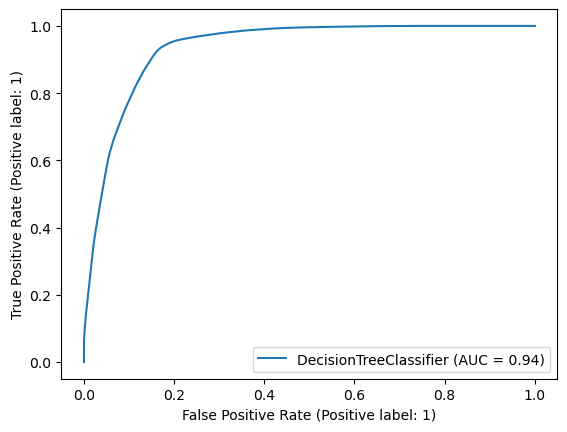

In [95]:
# Plot ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(intial_dt, X_train, y_train, drop_intermediate=False)
plt.show()

In [96]:
# Tuning
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [97]:
grid_search.best_score_

0.874845664031788

In [98]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=30, random_state=42)

In [99]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      8203
           1       0.87      0.93      0.90      8104

    accuracy                           0.89     16307
   macro avg       0.90      0.89      0.89     16307
weighted avg       0.90      0.89      0.89     16307



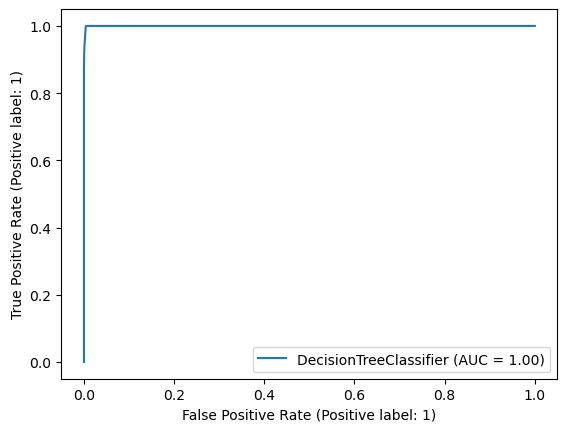

In [100]:
# ROC
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

## 3. Random Forest

Train accuracy : 0.8825199085389892
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      8203
           1       0.86      0.91      0.88      8104

    accuracy                           0.88     16307
   macro avg       0.88      0.88      0.88     16307
weighted avg       0.88      0.88      0.88     16307



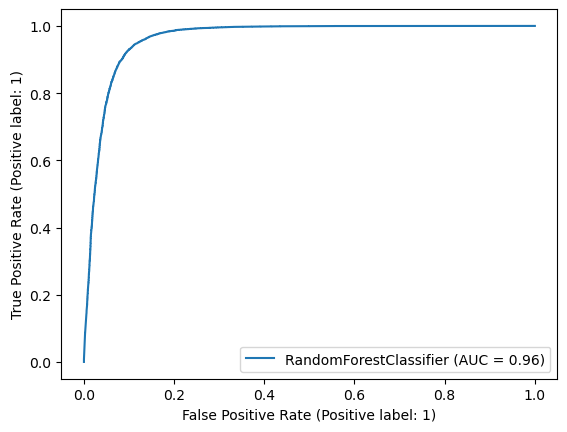

In [101]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [105]:
# tuning
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

In [106]:
# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [109]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [110]:
grid_search.best_score_

0.9371600226886195

In [111]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [112]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8203
           1       0.93      0.96      0.95      8104

    accuracy                           0.94     16307
   macro avg       0.95      0.94      0.94     16307
weighted avg       0.95      0.94      0.94     16307



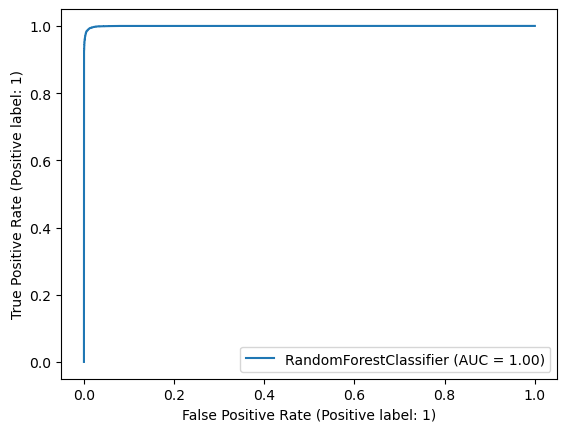

In [113]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

## 4. Adaboost

In [114]:
from sklearn.ensemble import AdaBoostClassifier

In [115]:
# Create a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.6684246029312565

In [116]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

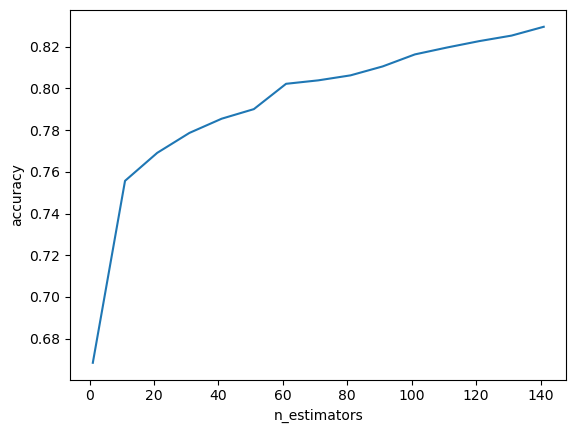

In [117]:
# Plot the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [118]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 200, random_state=25)
adaboost_best.fit(X_train, y_train)
y_pred = adaboost_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8203
           1       0.93      0.96      0.95      8104

    accuracy                           0.94     16307
   macro avg       0.95      0.94      0.94     16307
weighted avg       0.95      0.94      0.94     16307



## Conclusions
###### -Given our bussines probelm, to retain their customers, we need higher recall. As giving an offer to an user not going to churn will cost less as compared to loosing a customer and bring new customer, we need to have high rate of correctly identifying the true positives, hence recall.

###### -When we compare the models trained we can see the tuned random forest and ada boost are performing the best, which is highest accuracy along with highest recall i.e. 95% and 96% respectively. So, we will go with random forest instead of adaboost as that is comparetively simpler model.

In [119]:
final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [120]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)



# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18975
           1       0.98      1.00      0.99     19074

    accuracy                           0.99     38049
   macro avg       0.99      0.99      0.99     38049
weighted avg       0.99      0.99      0.99     38049

Report on test data
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8203
           1       0.93      0.96      0.95      8104

    accuracy                           0.94     16307
   macro avg       0.95      0.94      0.94     16307
weighted avg       0.95      0.94      0.94     16307

